### 图像模糊/图像平滑

In [1]:
from imutils import *

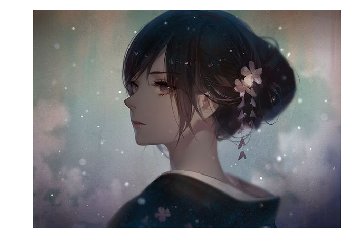

In [2]:
image = imread('image.jpg')
show(image)

### Averaging平均
计算卷积框覆盖区域所有像素的平均值得到卷积的结果  
[[1 1 1 1 1]  
 [1 1 1 1 1]  
 [1 1 1 1 1]  
 [1 1 1 1 1]  
 [1 1 1 1 1]]  

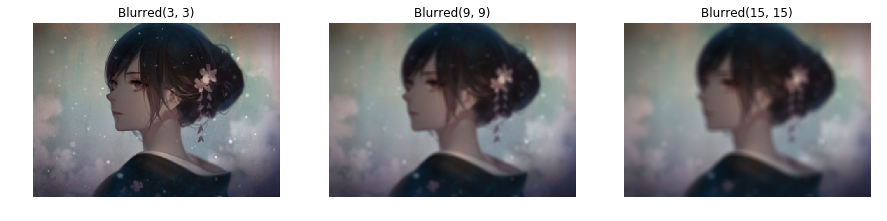

In [3]:
kernelsizes = [(3,3),(9,9),(15,15)]
plt.figure(figsize=(15,15))
for i,kernel in enumerate(kernelsizes):
    plt.subplot(1,3,i+1)
    # 平均平滑
    blur = cv2.blur(image, kernel)
    # 不显示坐标
    plt.axis('off')
    # 设置标题
    plt.title('Blurred'+str(kernel))
    plt.imshow(blur)
plt.show()

### Gaussian高斯模糊
现在把卷积核换成高斯核（简单来说，方框不变，将原来每个方框的值是
相等的，现在里面的值是符合高斯分布的，方框中心的值最大，其余方框根据
距离中心元素的距离递减，构成一个高斯小山包。原来的求平均数现在变成求
加权平均数，全就是方框里的值）

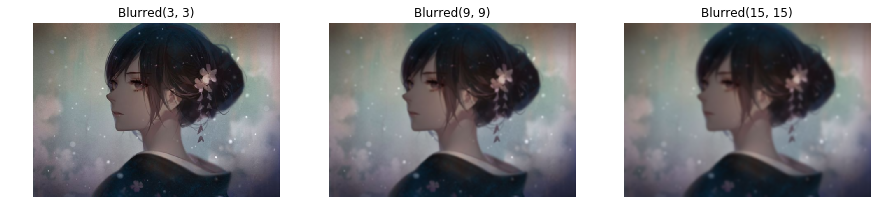

In [4]:
kernelsizes = [(3,3),(9,9),(15,15)]
plt.figure(figsize=(15,15))
for i,kernel in enumerate(kernelsizes):
    plt.subplot(1,3,i+1)
    # 平均平滑
    blur = cv2.GaussianBlur(image, kernel, 0)
    # 不显示坐标
    plt.axis('off')
    # 设置标题
    plt.title('Blurred'+str(kernel))
    plt.imshow(blur)
plt.show()

### Median中值模糊
顾名思义就是用与卷积框对应像素的中值来替代中心像素的值。

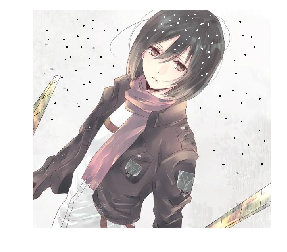

In [5]:
image = imread('image2.jpg')
show(image)

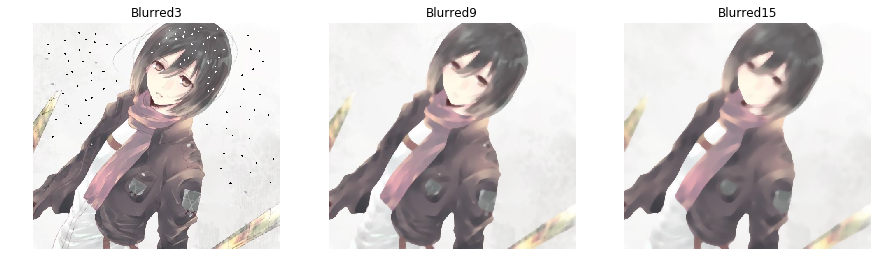

In [6]:
plt.figure(figsize=(15,15))
for i,kernel in enumerate((3,9,15)):
    plt.subplot(1,3,i+1)
    # 平均平滑
    blur = cv2.medianBlur(image, kernel)
    # 不显示坐标
    plt.axis('off')
    # 设置标题
    plt.title('Blurred'+str(kernel))
    plt.imshow(blur)
plt.show()

### Bilateral双边滤波
能在保持边界清晰的情况下有效的去除噪音。我们已经知道高斯滤波器是求中心点邻近区域像素的高斯加权平均值。这种高斯滤波器只考虑像素之间的空间关系，而不会考虑像素值之间的关系（像素的相似度）。所以这种方法不会考虑一个像素是否位于边界。因此边界也会别模糊掉，而这正不是我们想要。

双边滤波在同时使用空间高斯权重和灰度值相似性高斯权重。空间高斯函数确保只有邻近区域的像素对中心点有影响，灰度值相似性高斯函数确保只有与中心像素灰度值相近的才会被用来做模糊运算。所以这种方法会确保边界不会被模糊掉，因为边界处的灰度值变化比较大。

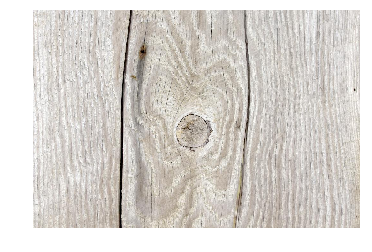

In [7]:
image = imread('wood.jpg')
show(image)

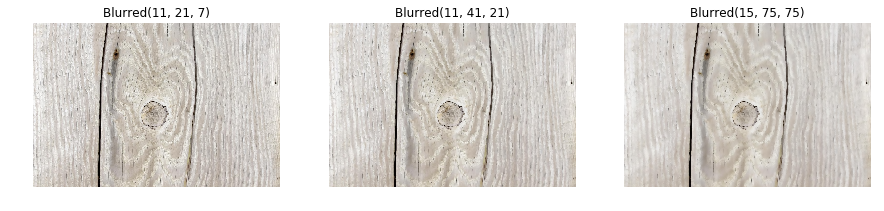

In [8]:
params = [(11,21,7),(11,41,21),(15,75,75)]
plt.figure(figsize=(15,15))
# 邻域直径，灰度值相似性高斯函数标准差，空间高斯函数标准差
for i,(diameter,sigmaColor,sigmaSpace) in enumerate(params):
    plt.subplot(1,3,i+1)
    # 平均平滑
    blur = cv2.bilateralFilter(image, diameter,sigmaColor,sigmaSpace)
    # 不显示坐标
    plt.axis('off')
    # 设置标题
    plt.title('Blurred'+str((diameter,sigmaColor,sigmaSpace)))
    plt.imshow(blur)
plt.show()